In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('./Results/pm_log.csv')
df.head()
                 

,time,pm_assignments,pm_ask_reports,pm_reassign,pm_work_on,pm_cooperations,pm_evaluate_performance,pm_motivate,pm_priority,pm_optimize,pm_take_chance,problems_count,escalate_problem_count,cooperation_prob,trust_in_agents,completed_tasks,fail_tasks
0,0,30,0,0,NaN,0,False,0,NaN,0,NaN,0,0,0.5,"[('Worker 0', 14), ('Worker 1', 15), ('Worker ...",0,0
1,10,0,0,0,NaN,0,False,0,NaN,0,"Risk(Probability: 0.3, Impact: ['Resource1', '...",0,0,0.5,"[('Worker 0', 14), ('Worker 1', 15), ('Worker ...",0,0
2,20,3,0,0,NaN,0,False,3,time,2,NaN,3,0,0.5,"[('Worker 0', 14), ('Worker 1', 15), ('Worker ...",2,0
3,30,15,0,0,NaN,0,False,3,time,2,NaN,3,0,0.5,"[('Worker 0', 14), ('Worker 1', 15), ('Worker ...",6,0
4,40,3,0,0,NaN,0,False,3,time,2,"Risk(Probability: 0.25, Impact: ['Resource5', ...",4,0,0.5,"[('Worker 0', 14), ('Worker 1', 15), ('Worker ...",9,0


In [10]:


# Crear una columna para simular el cambio de simulaciones
df['simulacion_id'] = (df['time'].shift(1) > df['time']).cumsum() + 1

# Mostrar las primeras filas
df.head()

,time,pm_assignments,pm_ask_reports,pm_reassign,pm_work_on,pm_cooperations,pm_evaluate_performance,pm_motivate,pm_priority,pm_optimize,pm_take_chance,problems_count,escalate_problem_count,cooperation_prob,trust_in_agents,completed_tasks,fail_tasks,simulacion_id
0,0,30,0,0,NaN,0,False,0,NaN,0,NaN,0,0,0.5,"[('Worker 0', 14), ('Worker 1', 15), ('Worker ...",0,0,1
1,10,0,0,0,NaN,0,False,0,NaN,0,"Risk(Probability: 0.3, Impact: ['Resource1', '...",0,0,0.5,"[('Worker 0', 14), ('Worker 1', 15), ('Worker ...",0,0,1
2,20,3,0,0,NaN,0,False,3,time,2,NaN,3,0,0.5,"[('Worker 0', 14), ('Worker 1', 15), ('Worker ...",2,0,1
3,30,15,0,0,NaN,0,False,3,time,2,NaN,3,0,0.5,"[('Worker 0', 14), ('Worker 1', 15), ('Worker ...",6,0,1
4,40,3,0,0,NaN,0,False,3,time,2,"Risk(Probability: 0.25, Impact: ['Resource5', ...",4,0,0.5,"[('Worker 0', 14), ('Worker 1', 15), ('Worker ...",9,0,1


<Figure size 1000x600 with 0 Axes>

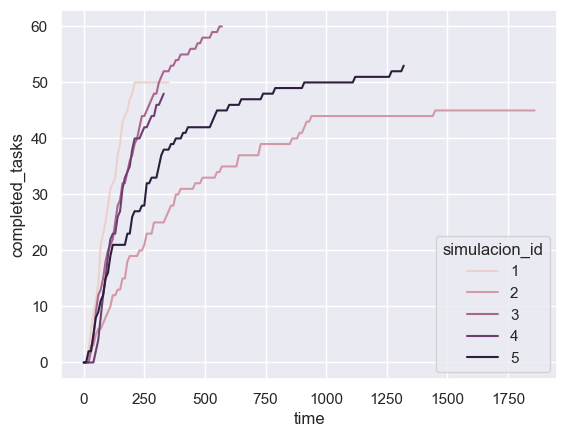

In [24]:
plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
sns.color_palette("Paired")

fig, ax = plt.subplots()
sns.lineplot(x='time', y='completed_tasks', hue='simulacion_id', data=df, ax=ax)
plt.show()

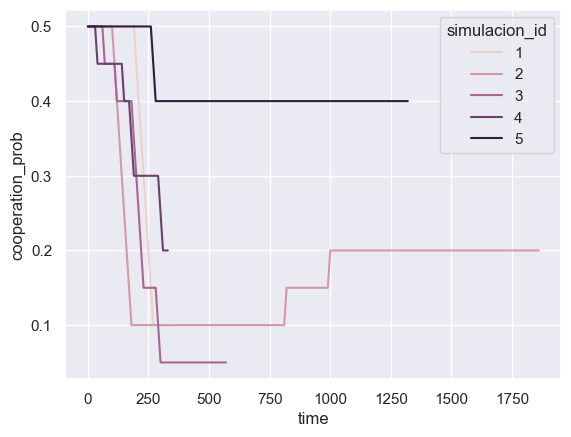

In [27]:
fig, ax = plt.subplots()
sns.lineplot(x='time', y='cooperation_prob', hue='simulacion_id', data=df, ax=ax)
plt.show()

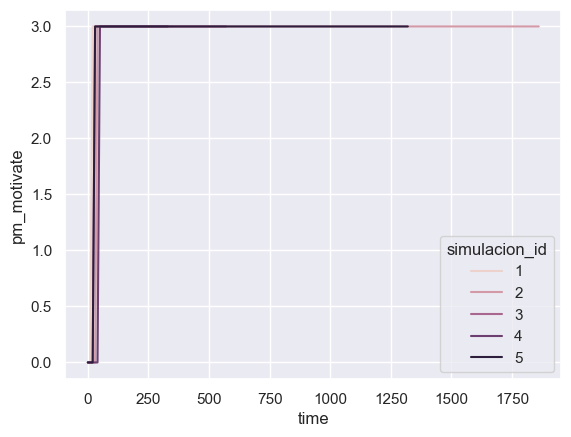

In [28]:
fig, ax = plt.subplots()
sns.lineplot(x='time', y='pm_motivate', hue='simulacion_id', data=df, ax=ax)
plt.show()

In [30]:
df.dtypes

time                         int64
pm_assignments               int64
pm_ask_reports               int64
pm_reassign                  int64
pm_work_on                 float64
pm_cooperations              int64
pm_evaluate_performance       bool
pm_motivate                  int64
pm_priority                 object
pm_optimize                  int64
pm_take_chance              object
problems_count               int64
escalate_problem_count       int64
cooperation_prob           float64
trust_in_agents             object
completed_tasks              int64
fail_tasks                   int64
simulacion_id                int64
dtype: object

In [34]:
def mean_workers(row, idx, df):
    sum = 0
    workers = eval(df.at[idx, 'trust_in_agents'])
    for w in workers:
        sum += w[1]

    return sum/len(workers)

df['trust_agents_mean'] = df.apply(lambda row: mean_workers(row, row.name, df), axis=1)
df.head()

,time,pm_assignments,pm_ask_reports,pm_reassign,pm_work_on,pm_cooperations,pm_evaluate_performance,pm_motivate,pm_priority,pm_optimize,pm_take_chance,problems_count,escalate_problem_count,cooperation_prob,trust_in_agents,completed_tasks,fail_tasks,simulacion_id,trust_agents_mean
0,0,30,0,0,NaN,0,False,0,NaN,0,NaN,0,0,0.5,"[('Worker 0', 14), ('Worker 1', 15), ('Worker ...",0,0,1,24.8
1,10,0,0,0,NaN,0,False,0,NaN,0,"Risk(Probability: 0.3, Impact: ['Resource1', '...",0,0,0.5,"[('Worker 0', 14), ('Worker 1', 15), ('Worker ...",0,0,1,24.8
2,20,3,0,0,NaN,0,False,3,time,2,NaN,3,0,0.5,"[('Worker 0', 14), ('Worker 1', 15), ('Worker ...",2,0,1,24.8
3,30,15,0,0,NaN,0,False,3,time,2,NaN,3,0,0.5,"[('Worker 0', 14), ('Worker 1', 15), ('Worker ...",6,0,1,24.8
4,40,3,0,0,NaN,0,False,3,time,2,"Risk(Probability: 0.25, Impact: ['Resource5', ...",4,0,0.5,"[('Worker 0', 14), ('Worker 1', 15), ('Worker ...",9,0,1,24.8


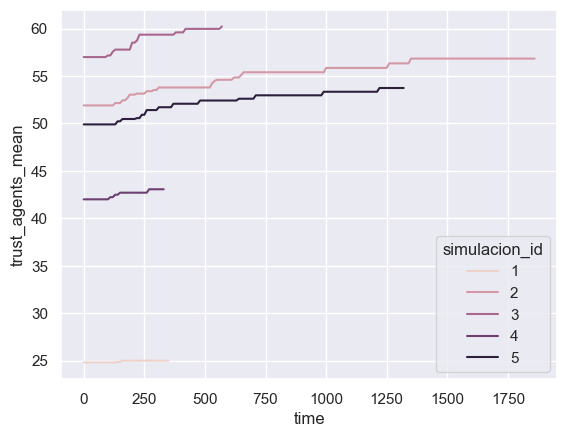

In [35]:
fig, ax = plt.subplots()
sns.lineplot(x='time', y='trust_agents_mean', hue='simulacion_id', data=df, ax=ax)
plt.show()

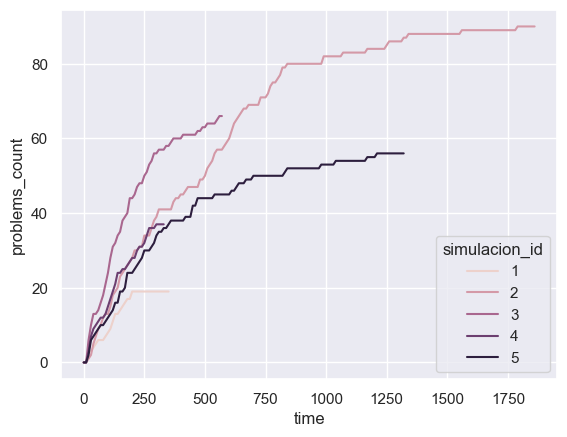

In [37]:
fig, ax = plt.subplots()
sns.lineplot(x='time', y='problems_count', hue='simulacion_id', data=df, ax=ax)
plt.show()

In [43]:
gcols = [           
    'pm_reassign'             ,          
    'pm_cooperations'         ,  
    'pm_motivate'             ,  
    'pm_take_chance'          ,  
    'problems_count'          ,  
    'cooperation_prob'        ,  
    'completed_tasks'         
]
gagg = {
    'pm_reassign'             : 'sum' ,          
    'pm_cooperations'         : 'sum',   
    'pm_motivate'             : 'median',  
    'pm_take_chance'          : 'count',  
    'problems_count'          : 'max',  
    'cooperation_prob'        : 'mean',  
    'completed_tasks'         : 'max'

}
df_summary = df[gcols].groupby(['simulacion_id']).mean()
df_summary.head()

KeyError: 'simulacion_id'